In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [10]:
df_report_daily = pd.read_csv('df_report_conv_daily.csv')
df_report_daily['date'] = pd.to_datetime(df_report_daily['date'])
df_report_weekly = pd.read_csv('df_report_conv_weekly.csv')
df_report_weekly['week_date'] = pd.to_datetime(df_report_weekly['week_date'])

In [15]:
df_report_mobile_daily = df_report_daily[df_report_daily['deviceCategory'] == 'mobile']
df_report_mobile_daily.head(1)

,date,deviceCategory,uniq_users,addedToCart,conv
1,2020-08-01 00:00:00+00:00,mobile,224,14.0,6.25


<Axes: xlabel='conv'>

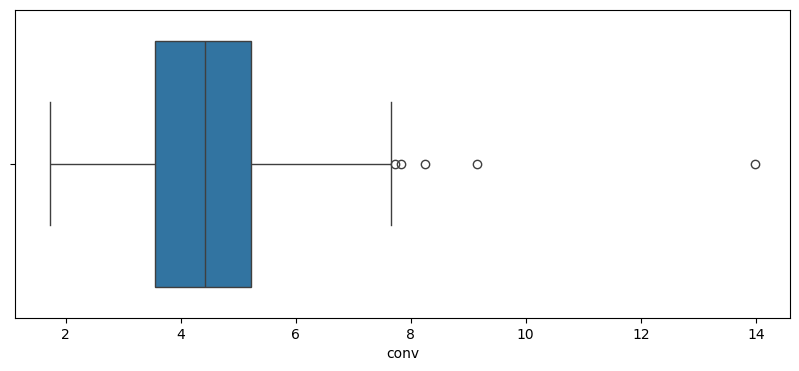

In [ ]:
# i can change orientation of boxplot by using 'x' or 'y' arguments
# x -- horizontal
plt.figure(figsize=(10, 4))
sns.boxplot(df_report_mobile_daily, x='conv')

<Axes: ylabel='conv'>

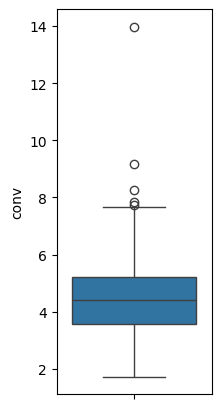

In [22]:
# i can change orientation of boxplot by using 'x' or 'y' arguments
# y -- vertical
plt.figure(figsize=(2, 5))
sns.boxplot(df_report_mobile_daily, y='conv')

<Axes: ylabel='conv'>

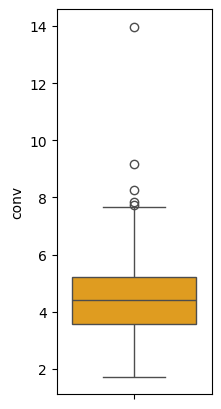

In [ ]:
# i can customize boxplot
plt.figure(figsize=(2, 5))
sns.boxplot(df_report_mobile_daily, y='conv', color='orange')

[Text(0, 0.5, 'conversion_rate')]

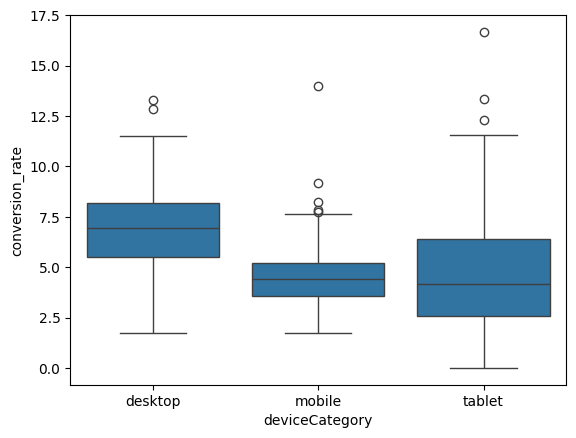

In [ ]:
# i can also use boxplot for unfiltered data
ax = sns.boxplot(df_report_daily, y='conv', x='deviceCategory')
ax.set(ylabel='conversion_rate')
# from this data i can see that average conversion rate on desktop is better than on mobile and tablet

In [26]:
df_report_mobile_daily.head(1)

,date,deviceCategory,uniq_users,addedToCart,conv
1,2020-08-01 00:00:00+00:00,mobile,224,14.0,6.25


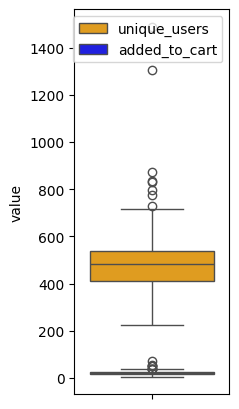

In [32]:
# i can also use boxplot with two different parameters
# i can just use same function two times in one box? same as line chart?
plt.figure(figsize=(2, 5))
sns.boxplot(df_report_mobile_daily, y='uniq_users', color='orange')
ax = sns.boxplot(df_report_mobile_daily, y='addedToCart', color='blue')
ax.set(ylabel='value')
# this is how to add custom legend to the chart
plt.legend(labels=['unique_users', 'added_to_cart'])

In [ ]:
# but this is hard to read, even if i make it bigger

In [34]:
df_report_mobile_daily

,date,deviceCategory,uniq_users,addedToCart,conv
1,2020-08-01 00:00:00+00:00,mobile,224,14.0,6.25
4,2020-08-02 00:00:00+00:00,mobile,318,6.0,1.89
7,2020-08-03 00:00:00+00:00,mobile,374,26.0,6.95
10,2020-08-04 00:00:00+00:00,mobile,399,16.0,4.01
13,2020-08-05 00:00:00+00:00,mobile,347,26.0,7.49
...,...,...,...,...,...
898,2021-05-27 00:00:00+00:00,mobile,533,24.0,4.50
901,2021-05-28 00:00:00+00:00,mobile,496,23.0,4.64
904,2021-05-29 00:00:00+00:00,mobile,496,23.0,4.64
907,2021-05-30 00:00:00+00:00,mobile,439,17.0,3.87


In [35]:
# i can use melt function to make it better
# im dropping columns that i dont need and melting df by date
df_report_md_melted = df_report_mobile_daily.drop(['deviceCategory', 'conv'], axis=1).melt(id_vars='date')
df_report_md_melted

,date,variable,value
0,2020-08-01 00:00:00+00:00,uniq_users,224.0
1,2020-08-02 00:00:00+00:00,uniq_users,318.0
2,2020-08-03 00:00:00+00:00,uniq_users,374.0
3,2020-08-04 00:00:00+00:00,uniq_users,399.0
4,2020-08-05 00:00:00+00:00,uniq_users,347.0
...,...,...,...
603,2021-05-27 00:00:00+00:00,addedToCart,24.0
604,2021-05-28 00:00:00+00:00,addedToCart,23.0
605,2021-05-29 00:00:00+00:00,addedToCart,23.0
606,2021-05-30 00:00:00+00:00,addedToCart,17.0


/var/folders/m2/02db1vqj4dn9n70qsljztby00000gn/T/ipykernel_60787/3039646387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_report_md_melted, x='variable', y='value', palette=palette)


<Axes: xlabel='variable', ylabel='value'>

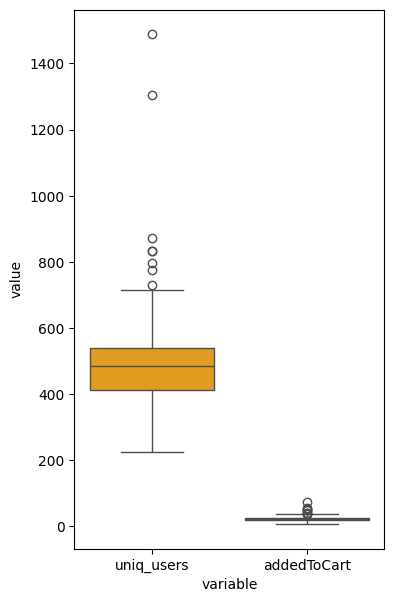

In [39]:
plt.figure(figsize=(4, 7))
# this can be used as palette fot boxplot
palette = {'uniq_users': 'orange', 'addedToCart': 'blue'}
# in this situation 'y' is for first box and 'x' if for second
sns.boxplot(df_report_md_melted, x='variable', y='value', palette=palette)